In [1]:
from math import sqrt, exp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def distancia(ponto1, ponto2):
    return sqrt((ponto1[0]-ponto2[0])**2 + (ponto1[1]-ponto2[1])**2)

def filtroPassaBaixa(D0, formatoImagem):
    base = np.zeros(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if distancia((y,x), centro) < D0:
                base[y,x] = 1
    return base

def filtroPassaAlta(D0, formatoImagem):
    base = np.ones(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if distancia((y,x), centro) < D0:
                base[y,x] = 0
    return base

def filtroPassaFaixa(D0, D1, formatoImagem):
    base = np.zeros(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if D0 < distancia((y, x), centro) < D1:
                base[y, x] = 1
    return base


def comprimirLimite(img, thresh):
    matrizComMascara = np.abs(img) > thresh
    # percentage calculation
    contadorPixel =  img.shape[0] * img.shape[1]
    pixelsMantidos = np.sum(matrizComMascara)
    porcentagem = (pixelsMantidos/contadorPixel)*100
    return img * matrizComMascara, porcentagem

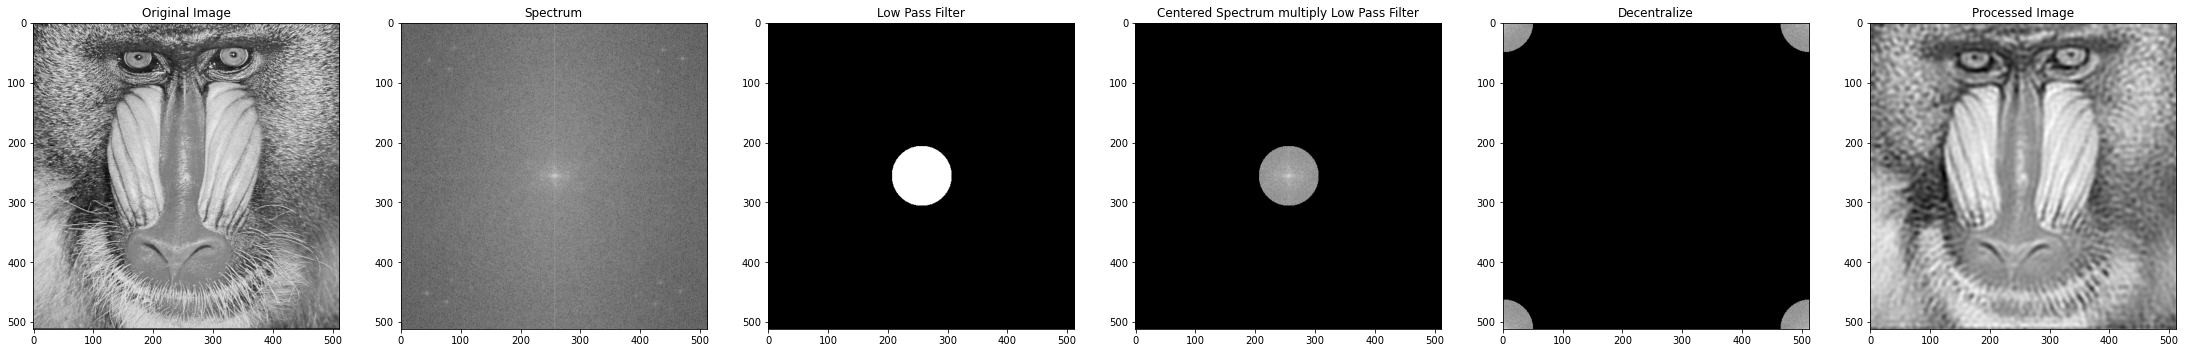

In [3]:
img = cv2.imread("baboon.png", 0)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = filtroPassaBaixa(50,img.shape)
plt.subplot(163), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * filtroPassaBaixa(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

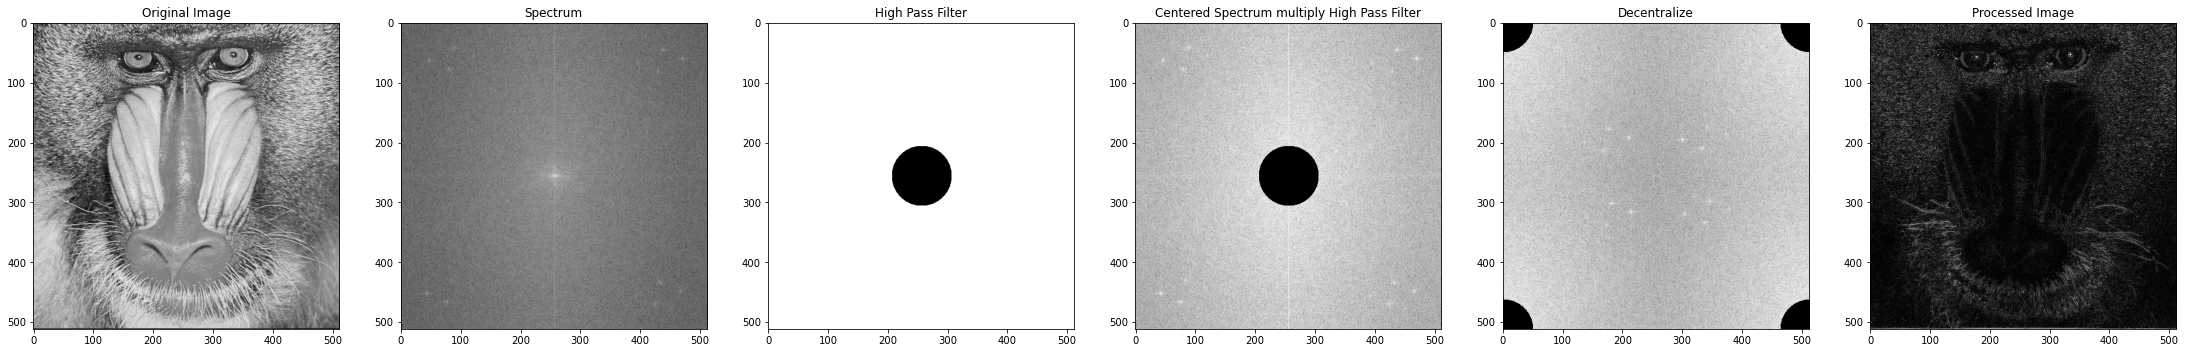

In [4]:
img = cv2.imread("baboon.png", 0)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = filtroPassaAlta(50,img.shape)
plt.subplot(163), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * filtroPassaAlta(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

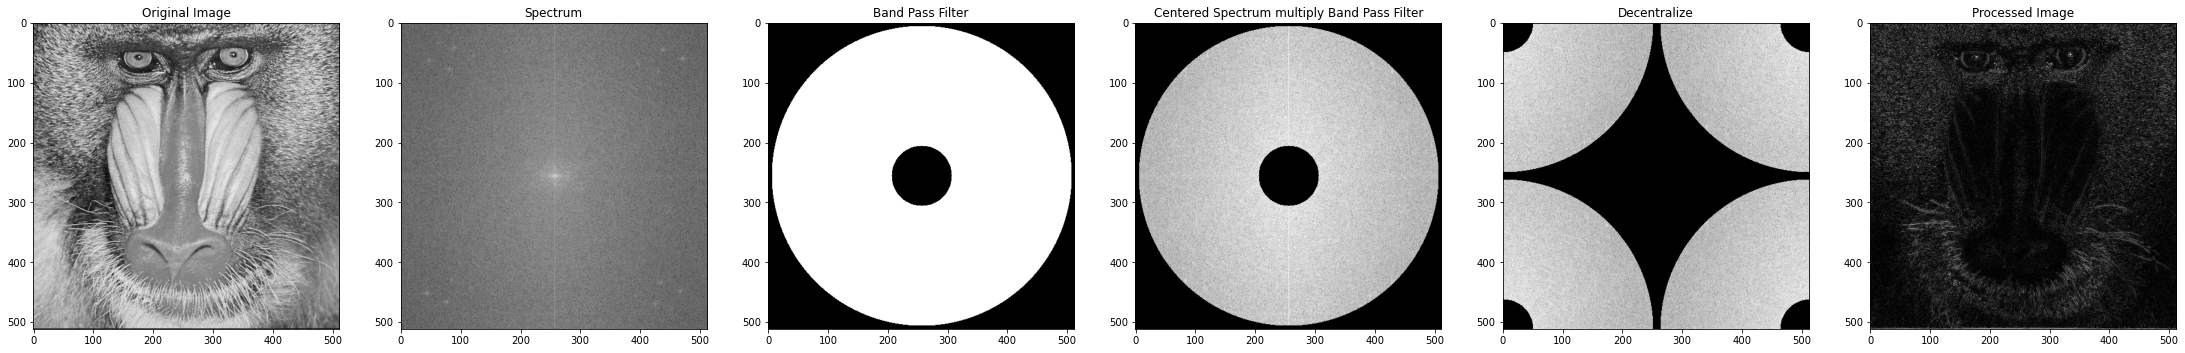

In [5]:
img = cv2.imread("baboon.png", 0)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

BandPass = filtroPassaFaixa(50, 250, img.shape)
plt.subplot(163), plt.imshow(np.abs(BandPass), "gray"), plt.title("Band Pass Filter")

BandPassCenter = center * filtroPassaFaixa(50, 250, img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(BandPassCenter)), "gray"), plt.title("Centered Spectrum multiply Band Pass Filter")

BandPass = np.fft.ifftshift(BandPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(BandPass)), "gray"), plt.title("Decentralize")

inverse_BandPass = np.fft.ifft2(BandPass)
plt.subplot(166), plt.imshow(np.abs(inverse_BandPass), "gray"), plt.title("Processed Image")

plt.show()

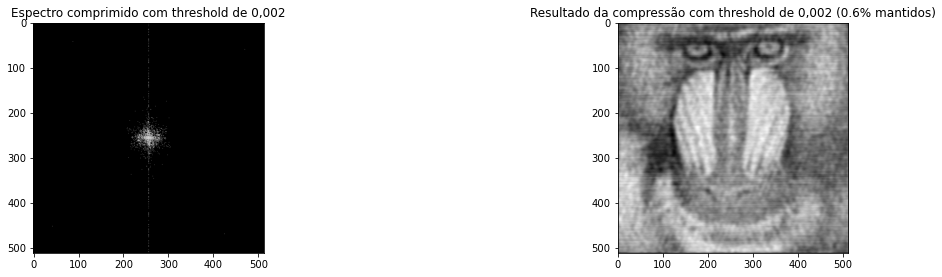

In [6]:
img = cv2.imread("baboon.png", 0)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

getThresh = lambda thresh: np.max(np.abs(center))*thresh

thresh= getThresh(0.002)
cmpThresh, percentage = comprimirLimite(center, thresh)

i = np.fft.ifft2(cmpThresh)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(321), plt.imshow(np.log(1+np.abs(cmpThresh)), "gray"), plt.title("Espectro comprimido com threshold de 0,002")
plt.subplot(322), plt.imshow(np.abs(i), "gray"), plt.title("Resultado da compress√£o com threshold de 0,002 ({:.1f}% mantidos)".format(percentage))


plt.show()

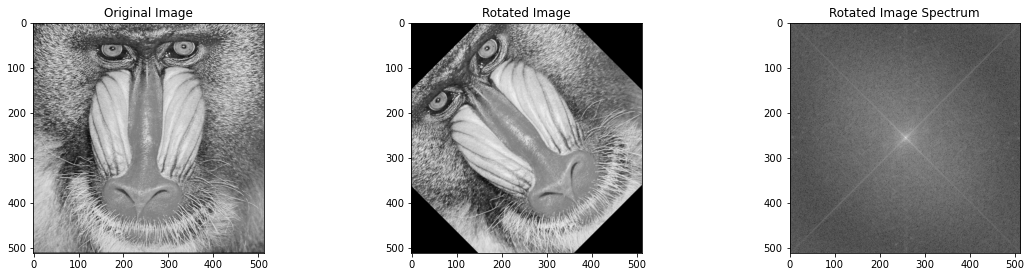

In [7]:
img = cv2.imread("baboon.png", 0)

(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

original = np.fft.fft2(rotated)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(331), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(332), plt.imshow(rotated, "gray"), plt.title("Rotated Image")

plt.subplot(333), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Rotated Image Spectrum")

plt.show()